***
### Sensor data visualization for all participants
Per Scenario
***

In [25]:
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
import glob
from matplotlib.lines import Line2D
from os.path import exists
from functions import show_values

import functions
# Increase image size
matplotlib.rcParams['figure.figsize'] = [40, 10]
# Increase font size
matplotlib.rcParams['font.size'] = 40
# Path
path_viz = './Visualization/'

In [16]:
df = pd.read_csv('./Data/output\\2022-12-06_20-35-41/ACC_GYRO_annot.csv')
df

,time,seconds_elapsed_x,ACC_Z,ACC_Y,ACC_X,seconds_elapsed_y,GYRO_Z,GYRO_Y,GYRO_X,seconds_elapsed,text
0,1670358941526095000,0.237095,-0.051105,-0.008579,0.004120,0.237095,-0.001198,-0.001598,0.000666,NaN,NaN
1,1670358941536018400,0.247018,-0.039528,0.005057,0.005821,0.247018,-0.000133,-0.000533,0.001731,NaN,NaN
2,1670358941545941800,0.256942,-0.038113,0.017600,0.022669,0.256942,-0.000133,-0.000533,0.000666,NaN,NaN
3,1670358941555864800,0.266865,-0.030545,0.011678,0.020639,0.266865,-0.001198,-0.001598,0.000666,NaN,NaN
4,1670358941565788200,0.276788,-0.034830,0.006293,0.019006,0.276788,-0.001198,-0.000533,0.000666,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2928,1670358970551983000,29.262983,0.024566,-0.003135,-0.007701,29.262983,-0.001198,-0.000533,0.000666,NaN,Yyy
2929,1670358970561906400,29.272906,0.002955,-0.010218,-0.000554,29.272906,-0.001198,-0.000533,0.000666,NaN,Yyy
2930,1670358970571829800,29.282830,0.000550,-0.010013,-0.002948,29.282830,-0.001198,-0.000533,-0.000399,NaN,Yyy
2931,1670358970581753300,29.292753,-0.006525,-0.019336,-0.000592,29.292753,-0.001198,-0.000533,0.000666,NaN,Yyy


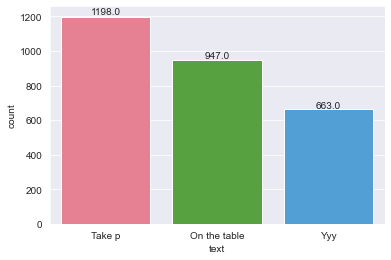

In [17]:
ax = sns.countplot(x="text", data=df, palette="husl", order=df['text'].value_counts().index)
show_values(ax)

In [33]:
filepath_sensors = './Data/input/'
sensors = ['Accelerometer','Gyroscope','Magnetometer', 'Light']

texting_data = pd.DataFrame()
walking_data = pd.DataFrame()
telephone_data = pd.DataFrame()

participantlist = []

for sensor in sensors:
    # run through all participants here
    for participant_filepath in glob.iglob(filepath_sensors + "*/", recursive=True):
        components = os.path.normpath(participant_filepath)
        components = components.split(os.path.sep)
        participant = components[-1]

        # read in labels
        Annotation = pd.read_csv('{}Annotation.csv'.format(participant_filepath))
        Annotation['time'] = Annotation['time'].astype('float64')
        Annotation.set_index('time', inplace=True)

        e4_data = pd.read_csv(participant_filepath + sensor + ".csv")
        e4_data['time'] = e4_data['time'].astype('float64')
        # use only E4 data needed
        if e4_data.empty:
            continue
        e4_data = pd.merge_ordered(e4_data,Annotation,on="time")
        e4_data.text.ffill(inplace=True)
        e4_data['participant'] = participant
        participantlist = np.append(participantlist,participant)
        texting=e4_data.loc[e4_data['text'] == 'texting']
        walking=e4_data.loc[e4_data['text'] == 'walking']
        telephone=e4_data.loc[e4_data['text'] == 'telephone']

        texting['Timing'] = np.arange(texting.shape[0])
        walking['Timing'] = np.arange(walking.shape[0])
        telephone['Timing'] = np.arange(telephone.shape[0])

        texting_data = pd.concat([texting_data, texting], ignore_index=True)
        walking_data = pd.concat([walking_data, walking], ignore_index=True)
        telephone_data = pd.concat([telephone_data, telephone], ignore_index=True)

        texting_data.to_csv("./data/sensor_visualization/" + sensor + "_texting_all.csv", index=False)
        walking_data.to_csv("./data/sensor_visualization/" + sensor + "_walking_all.csv", index=False)
        telephone_data.to_csv("./data/sensor_visualization/" + sensor + "_telephone_all.csv", index=False)

[Text(0.5, 1.0, 'neutral')]

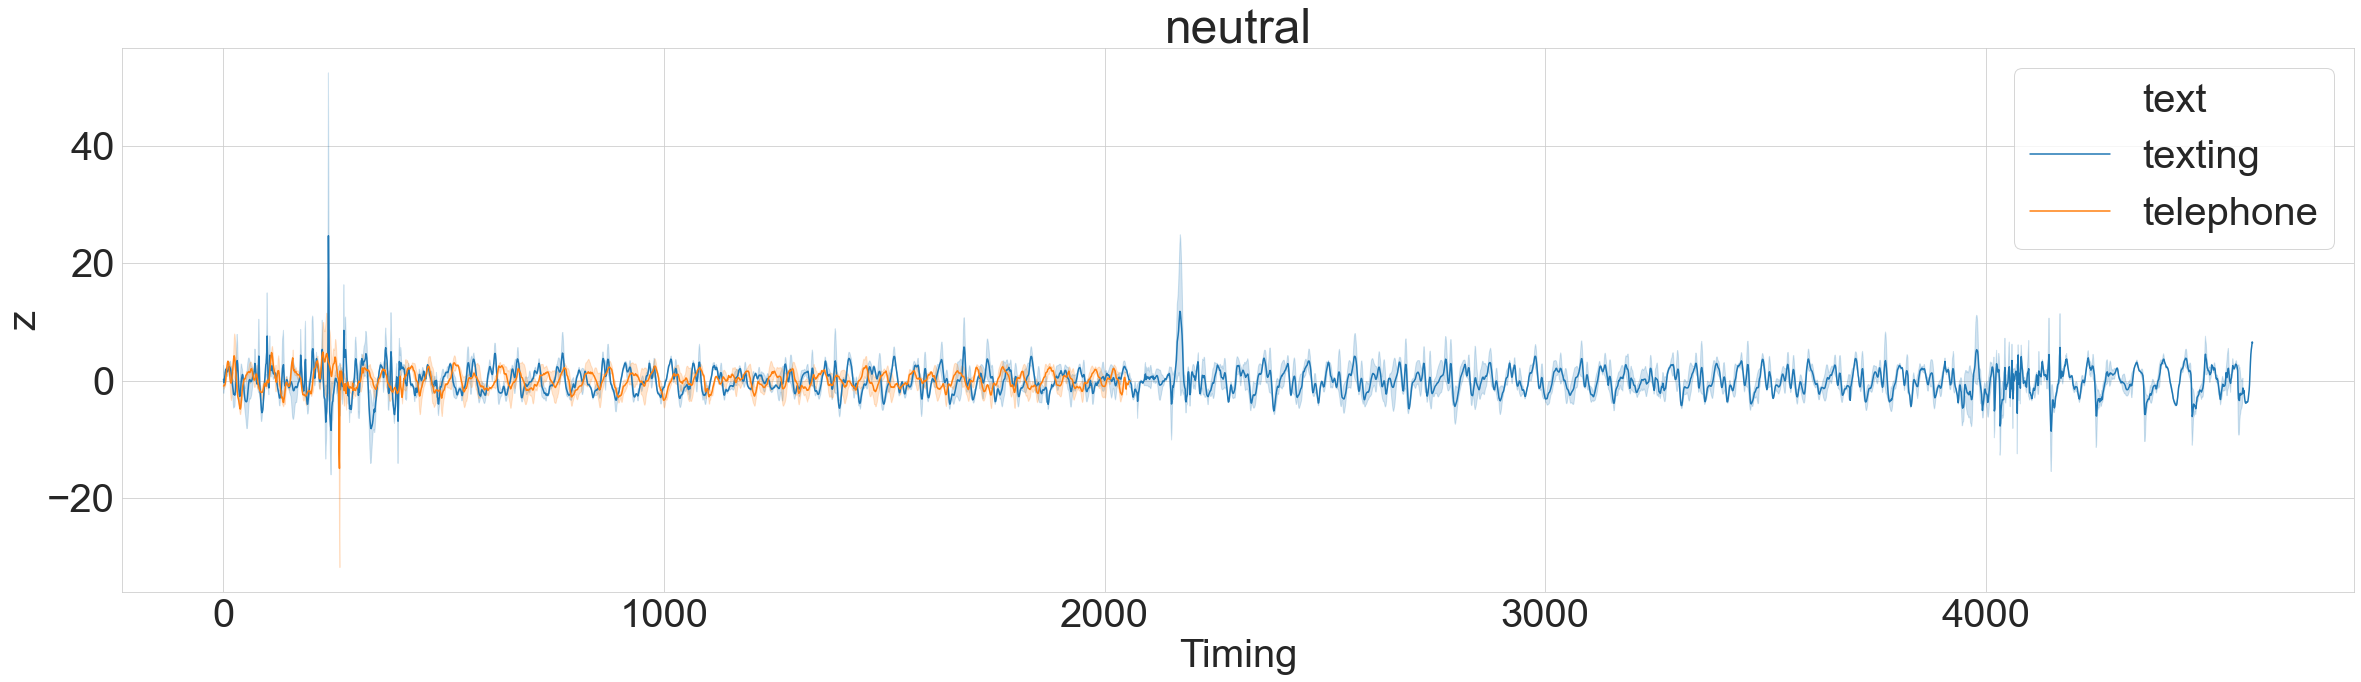

In [23]:
# GSR Import
texting_data = pd.read_csv("./data/sensor_visualization/Accelerometer_texting_all.csv")
telephone_data = pd.read_csv("./data/sensor_visualization/Accelerometer_telephone_all.csv")
walking_data = pd.read_csv("./data/sensor_visualization/Accelerometer_walking_all.csv")
df = pd.concat([texting_data, telephone_data], ignore_index=True)

sns.lineplot(x="Timing", y="z", hue="text", data=df).set(title="neutral")
# plt.savefig(path_viz + 'Accelerometer, te_te.pdf', bbox_inches='tight')

[Text(0.5, 1.0, 'neutral')]

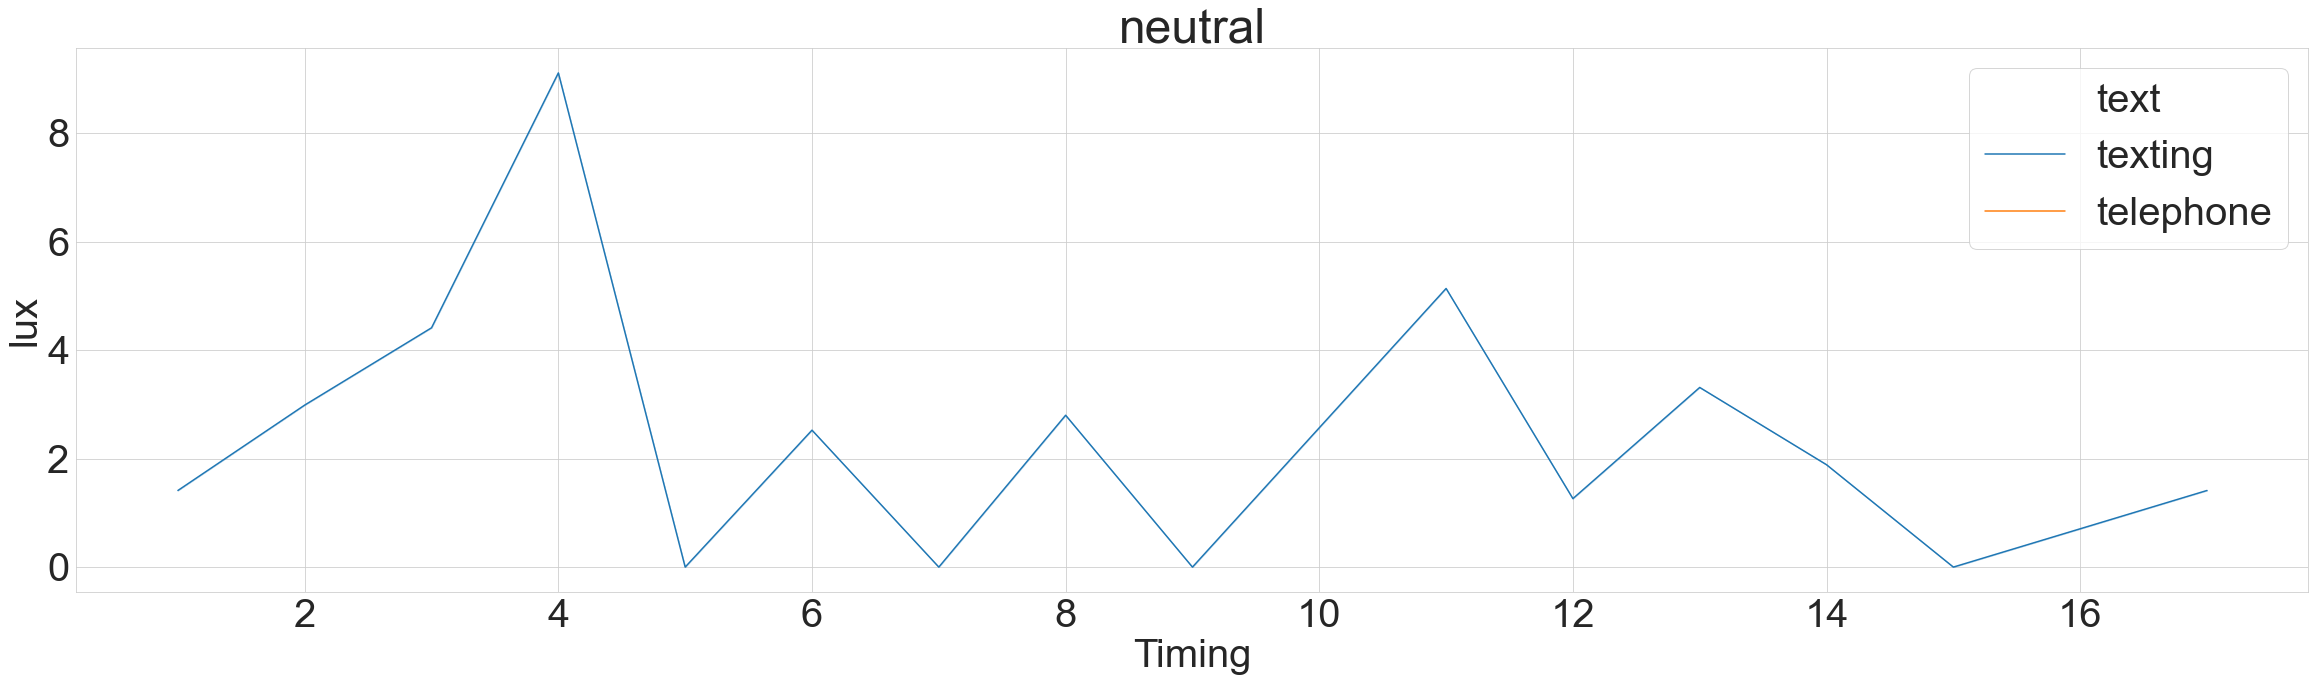

In [29]:
texting_data = pd.read_csv("./data/sensor_visualization/Light_texting_all.csv")
telephone_data = pd.read_csv("./data/sensor_visualization/Light_telephone_all.csv")
walking_data = pd.read_csv("./data/sensor_visualization/Light_walking_all.csv")
df = pd.concat([texting_data, telephone_data], ignore_index=True)

sns.lineplot(x="Timing", y="lux", hue="text", data=df).set(title="neutral")